# Examen Módulo 1 - Optimización. <font color=blue>Tipo de examen 2</font>.

**Lea cuidadosamente las siguientes indicaciones antes de comenzar el examen:**
- Para resolver el examen edite este mismo archivo y renómbrelo de la siguiente manera: *Examen1_ApellidoNombre*, donde *ApellidoNombre* corresponde a su apellido paterno con la inicial en mayúscula, seguido de su primer nombre con la inicial en mayúscula **sin acentos**. Por ejemplo, en mi caso el nombre del archivo sería *Examen1_ArellanoCarlos*.
- Resuelva los puntos en el espacio provisto. Si requiere agregar más celdas para código o escritura, hágalo (`Esc`+`B`) o (`Esc`+`A`).
- Recuerde que también se está evaluando su capacidad de interpretar los resultados. Escriba sus interpretaciones/conclusiones en celdas utilizando *Markdown*.
- El formato de presentación de todo el examen en general debe ser adecuado. Use tamaños de letra, colores, etiquetas, etcétera.
- No se resuelven dudas de ningún tipo por los profesores de la asignatura. Por favor, absténgase de preguntar.
- Revise bien el tipo de examen. Sólo se le calificará si realiza el tipo de examen asignado.

---
# Primer punto. Optimización de funciones con `SymPy` (35 puntos)

Considere una cruz simétrica inscrita en un círculo de radio $r$

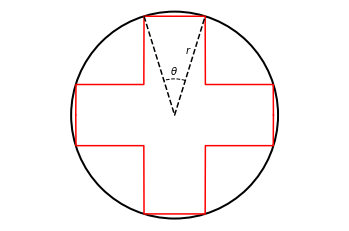

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

ct = np.cos(0.3)
st = np.sin(0.3)
x = np.linspace(-ct,ct,1000)
y = np.zeros(np.shape(x))
y[1:500] = [st if i < -st else ct for i in x[1:500]]
y[500:999] = [st if i > st else ct for i in x[500:999]]

p = patches.Circle((0, 0), 1,fc='w',lw=2,color='k')
ax = plt.gca()
ax.add_artist(p)
plt.text(0.1,0.6,'$r$')

plt.plot(x,y,'r')
plt.plot(x,-y,'r')

plt.plot([-st,0,st],[ct,0,ct],'k--')
plt.text(-0.04,0.4,r'$\theta$')
a = patches.Arc((0, 0),0.7,0.7,90,theta1=-0.3*180/np.pi,theta2=0.3*180/np.pi,
                fc='w',color='k',ls='--')
ax.add_artist(a)

plt.axis([-1,1,-1,1])
plt.axis('equal')
plt.axis('off')
#plt.tight_layout()
plt.show()

1. Escribir el área $A$ de la cruz como una función de $\theta$. Realice este punto usando fórmulas de $\LaTeX$, en celdas *Markdown*. (15 puntos)
2. Determinar el valor de $\theta$ que maximiza el área para un radio $r=2$. (10 puntos)
3. ¿Cuál es el área máxima de la cruz? (10 puntos)

**Pista:** Divida la cruz en cuatro partes iguales determinadas por los ejes $x$ y $y$. El resto es trigonometría básica.

$$ l = rsin(θ/2) $$
$$ b = rcos(θ/2) $$

$$ A_c= 4(2bl)-(2l)^2 $$

$$ A_c= 4(2rcos(θ/2)rsin(θ/2))-(2rsin(θ/2))^2 $$

$$ r = 2 $$
$$ θ = x $$

$$ A_c(x)= 4(2rcos(x/2))(rsin(x/2))-(2rsin(x/2))^2 $$
$$ A_c(x)= 4(2(2cos(x/2))(2sin(x/2))-(2(2sin(x/2)))^2 $$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sympy as sp

In [3]:
r = 2
x = sp.var("x")


def A(x) :
    return 4*(2*r*sp.cos(x/2))*(r*sp.sin(x/2))-(2*r*sp.sin(x/2))**2
A(x)

-16*sin(x/2)**2 + 32*sin(x/2)*cos(x/2)

In [4]:
dA = sp.diff(A(x), x)
dA

-16*sin(x/2)**2 - 16*sin(x/2)*cos(x/2) + 16*cos(x/2)**2

In [18]:
pc = sp.solve(dA, x)
pc

[4*atan(-1/2 + sqrt(5)/2 + sqrt(2)*sqrt(5 - sqrt(5))/2),
 -4*atan(1/2 + sqrt(5)/2 + sqrt(2)*sqrt(sqrt(5) + 5)/2),
 -4*atan(-sqrt(5)/2 + 1/2 + sqrt(2)*sqrt(5 - sqrt(5))/2),
 -4*atan(-sqrt(2)*sqrt(sqrt(5) + 5)/2 + 1/2 + sqrt(5)/2)]

In [19]:
def As(x) :
    return 4*(2*r*sp.cos(x/2))*(r*sp.sin(x/2))-(2*r*sp.sin(x/2))**2


for valor in pc :
    print(As(float(valor)))

-25.8885438199983
9.88854381999832
-25.8885438199983
9.88854381999832


In [20]:
for valor in pc :
    print(float(valor))

4.2487413713838835
-5.176036589385496
-2.0344439357957027
1.1071487177940904


## Tenemos dos valores de x que maximizan el área de la cruz (-5.17 y 1.10), como x es un ángulo es más fácil quedarnos con el valor que es positivo.

### El área máxima de la cruz es de 9.88 y el valor de θ que lo permite es 1.107

---
# Segundo punto. Programación lineal (35 puntos)

Un empresario pretende fabricar dos tipos de congeladores denominados A y B. Cada uno de ellos debe pasar por tres operaciones antes de su comercialización: 
<table>
  <tr>
      <th></th>
      <th>Ensamblaje</th>
      <th>Pintura</th>
      <th>Calidad</th>
  </tr>
  <tr>
      <th>Congeladores tipo A</th>
      <td>2.5 horas</td>
      <td>3 kg</td>
      <td>14 horas</td>
  </tr>
  <tr style="border-bottom: 1px solid #000;">
      <th>Congeladores tipo B</th>
      <td>3 horas</td>
      <td>6 kg</td>
      <td>10 horas</td>
  </tr>
  <tr>
      <td>Disponibilidad</td>
      <td>4500 horas</td>
      <td>8400 kg</td>
      <td>20000 horas</td>
  </tr>
</table>

El empresario dispone semanalmente de:

* Máximo 4500 horas para ensamblaje
* Máximo 8400 Kg. de esmalte
* 20000 horas máximo, para control de calidad

Los costos totales de fabricación por unidad son, respectivamente, 30 y 28, y los precios de venta 52 y 48, todos ellos en miles de pesos. Además, los estudios de mercado muestran que la demanda semanal de congeladores no supera las 1700 unidades y que, en particular, la de tipo A es de, al menos 600 unidades.

<table>
  <tr>
      <th></th>
      <th>Costo</th>
      <th>Precio de venta</th>
  </tr>
  <tr>
      <th>Congeladores tipo A</th>
      <td>30</td>
      <td>52</td>
  </tr>
  <tr>
      <th>Congeladores tipo B</th>
      <td>28</td>
      <td>48</td>
  </tr>
</table>

Se desea conocer las unidades necesarias para **maximizar** la utilidad.

1. Escriba la función a **minimizar** junto con las restricciones, explicando detalladamente cada paso (usando fórmulas en $\LaTeX$, en celdas Markdown). Además escriba el problema en la forma \begin{equation}
\begin{array}{ll}
\min_{\boldsymbol{x}} & \boldsymbol{c}^T\boldsymbol{x} \\
\text{s. a. }        & \boldsymbol{A}_{eq}\boldsymbol{x}=\boldsymbol{b}_{eq} \\
                     & \boldsymbol{A}\boldsymbol{x}\leq\boldsymbol{b},
\end{array}\qquad\text{(25 puntos)}
\end{equation}
2. Resuelva el problema utilizando la función `linprog`. ¿Cuántos congeladores de cada tipo se deben producir (valores enteros)?, ¿Cuál es la ganancia? (10 puntos)

Utilidad de los congeladores en función de x:
$$ (52 - 30)x_A $$
$$ (48 - 28)x_B $$

Función objetivo de maximizar Utilidad:
$$ \min_{x_A,\dots,x_B}-22x_{A} - 20x_{B}$$

Funciones de restricción:
- $ x_A + x_B \leq 1700 $
- $ 2.5x_A + 3x_B \leq 4500 $
- $ 3x_A + 6x_B \leq 8400 $
- $ 14x_A + 10x_B \leq 20000 $
- $ -x_A \leq -600 $

In [10]:
import scipy.optimize as opt
import numpy as np

c = np.array([-22,-20])
A = np.array([[1,1],[2.5,3],[3,6],[14,10],[-1,0]])
b = np.array([1700,4500,8400,20000,-600])

ans = opt.linprog(c,A,b, method="simplex")

opt.linprog(c,A,b)

     con: array([], dtype=float64)
     fun: -34705.8789979671
 message: 'Optimization terminated successfully.'
     nit: 6
   slack: array([5.29413396e+01, 4.65958063e-04, 1.16470672e+03, 1.81731722e-03,
       2.82352895e+02])
  status: 0
 success: True
       x: array([882.35289457, 764.70576588])

In [11]:
ans.x

array([882.35294118, 764.70588235])

Obtenemos que $x_A = 882.35$ y $x_B = 764.70$, lo redondeamos y obtenemos que $x_A = 882$ y $x_B = 765$
Sustituimos los valores en nuestras ecuaciones de utilidad para obtener las ganancias totales
- Congeladores tipo A: $882*22 = 19404$
- Congeladores tipo B: $765*20 = 15300$

Obtenemos los siguientes resultados para maximizar ganancias:
- Producimos 882 congeladores tipo A
- Producimos 765 congeladores tipo B
- Obtenemos una Utilidad total de $34704

---
# Tercer punto. Ajuste de curvas (30 puntos)
Los siguientes datos extraidos de Administrative Office of the U.S. Courts, representan el número de bancarrotas en miles entre los años 1988 y 2001. 

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

date_rng=pd.date_range(start='1/1/1988', end='31/12/2001', freq='Y')
ban=pd.DataFrame(date_rng, columns=['date'])
ban = ban.set_index('date')
ban['values'] = np.array([594.6,643.0,725.5,880.4,972.5,918.7,845.3,858.1,
                           1042.1,1317.0,1429.5,1392.0,1277.0,1386.6])
ban

,values
date,
1988-12-31,594.6
1989-12-31,643.0
1990-12-31,725.5
1991-12-31,880.4
1992-12-31,972.5
1993-12-31,918.7
1994-12-31,845.3
1995-12-31,858.1
1996-12-31,1042.1


1. Ajuste los salarios con polinomios de grado 1 a 5 y muestre los errores de forma gráfica, ¿Qué polinómio se ajusta mejor? (20 puntos)
2. Muestre en un gráfico los datos y el polinómio que mejor se ajuste (5 puntos)
3. Usar el modelo para averiguar el número de bancarrotas a mdiados de 1995 y predecirlo para el año 2020. ¿Qué diferencias encuentra en cuanto a la interpolación y la extrapolación? (5 puntos)

In [24]:
l = np.arange(14)
ban = pd.DataFrame(columns=['date','values'], index = l)
ban['values'] = np.array([594.6,643.0,725.5,880.4,972.5,918.7,845.3,858.1,
                           1042.1,1317.0,1429.5,1392.0,1277.0,1386.6])
ban['date']=pd.date_range(start='1/1/1988', end='31/12/2001', freq='Y')
ban

,date,values
0,1988-12-31,594.6
1,1989-12-31,643.0
2,1990-12-31,725.5
3,1991-12-31,880.4
4,1992-12-31,972.5
5,1993-12-31,918.7
6,1994-12-31,845.3
7,1995-12-31,858.1
8,1996-12-31,1042.1
9,1997-12-31,1317.0


### Creamos una tabla con los mismos valores pero que nos deje utilizar los valores como variables. Redondeo fechas a numeros enteros. (ej. 31/12/2001 = 2002)

In [46]:
l = np.arange(14)
ban = pd.DataFrame(columns=['date','values'], index = l)
ban['values'] = np.array([594.6,643.0,725.5,880.4,972.5,918.7,845.3,858.1,
                           1042.1,1317.0,1429.5,1392.0,1277.0,1386.6])
ban['date']=np.array([1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002])
ban

,date,values
0,1989,594.6
1,1990,643.0
2,1991,725.5
3,1992,880.4
4,1993,972.5
5,1994,918.7
6,1995,845.3
7,1996,858.1
8,1997,1042.1
9,1998,1317.0


### Grafico la tabla de los datos del problema. Para la variable x le resto el valor mínimo (1989) para que sea más fácil trabajar posteriormente.

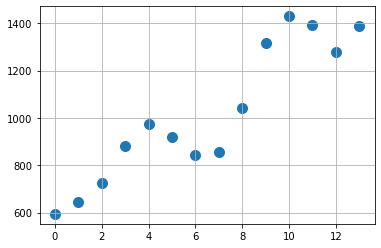

In [110]:
x = ban['date'] - 1989
y = ban['values']

plt.figure()
plt.scatter(x,y,s = 100)
plt.grid()

### Función de la ecuación de grado 1

In [111]:
import scipy.optimize as opt

def funcion_1(theta,x,y):
    prediccion = theta[0] + theta[1]*x
    error = y - prediccion
    error_2 = error**2
    return np.sum(error_2)

theta_inicial_1 = np.random.rand(2)
ans = opt.minimize(funcion_1,
                   theta_inicial_1,
                   args = (x, y))
br_1 = ans.fun
resultado_1 = ans.x
ans

      fun: 155674.7628131868
 hess_inv: array([[ 0.00039053, -0.00016285],
       [-0.00016285,  0.0002848 ]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 48
      nit: 9
     njev: 16
   status: 0
  success: True
        x: array([602.76856796,  64.21472566])

### Función de la ecuación de grado 2

In [112]:
def funcion_2(theta,x,y):
    prediccion = theta[0] + theta[1]*x + theta[2]*x**2
    error = y - prediccion
    error_2 = error**2
    return np.sum(error_2)

theta_inicial_2 = np.random.rand(3)
ans = opt.minimize(funcion_2,
                   theta_inicial_2,
                   args = (x, y))
br_2 = ans.fun
resultado_2 = ans.x
ans

      fun: 155674.61137089267
 hess_inv: array([[ 1.94760659e+00, -5.85145954e-01,  3.49019641e-02],
       [-5.85145954e-01,  1.78683187e-01, -1.07888580e-02],
       [ 3.49019641e-02, -1.07888580e-02,  6.62538655e-04]])
      jac: array([0.00195312, 0.00390625, 0.00195312])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 212
      nit: 9
     njev: 50
   status: 2
  success: False
        x: array([6.02955999e+02, 6.41210042e+01, 7.20950417e-03])

### Función de la ecuación de grado 3

In [113]:
def funcion_3(theta,x,y):
    prediccion = theta[0] + theta[1]*x + theta[2]*x**2 + theta[3]*x**3
    error = y - prediccion
    error_2 = error**2
    return np.sum(error_2)

theta_inicial_3 = np.random.rand(4)
ans = opt.minimize(funcion_3,
                   theta_inicial_3,
                   args = (x, y))
br_3 = ans.fun
resultado_3 = ans.x
ans

      fun: 152011.49482552835
 hess_inv: array([[ 4.98386297e-03, -4.98406379e-03,  2.43186123e-03,
        -1.31447481e-04],
       [-4.98406379e-03,  4.98427586e-03, -2.43196796e-03,
         1.31453363e-04],
       [ 2.43186123e-03, -2.43196796e-03,  1.23478368e-03,
        -6.84813866e-05],
       [-1.31447481e-04,  1.31453363e-04, -6.84813866e-05,
         3.87273448e-06]])
      jac: array([-0.00195312, -0.00195312, -0.00195312, -0.01757812])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 555
      nit: 16
     njev: 107
   status: 2
  success: False
        x: array([ 6.30711045e+02,  3.25164624e+01,  6.31517737e+00, -3.23485477e-01])

### Función de la ecuación de grado 4

In [114]:
def funcion_4(theta,x,y):
    prediccion = theta[0] + theta[1]*x + theta[2]*x**2 + theta[3]*x**3 + theta[4]*x**4
    error = y - prediccion
    error_2 = error**2
    return np.sum(error_2)

theta_inicial_4 = np.random.rand(5)
ans = opt.minimize(funcion_4,
                   theta_inicial_4,
                   args = (x, y))
br_4 = ans.fun
resultado_4 = ans.x
ans

      fun: 106381.977607796
 hess_inv: array([[ 2.79334315e-01,  5.31932930e-01, -2.51355476e-01,
         3.21148846e-02, -1.24336491e-03],
       [ 5.31932930e-01,  1.02032718e+00, -4.85965981e-01,
         6.23811432e-02, -2.42279042e-03],
       [-2.51355476e-01, -4.85965981e-01,  2.33434862e-01,
        -3.01136555e-02,  1.17344963e-03],
       [ 3.21148846e-02,  6.23811432e-02, -3.01136555e-02,
         3.89868091e-03, -1.52336720e-04],
       [-1.24336491e-03, -2.42279042e-03,  1.17344963e-03,
        -1.52336720e-04,  5.96582203e-06]])
      jac: array([-0.00195312,  0.        ,  0.00195312,  0.00097656, -0.00488281])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 474
      nit: 11
     njev: 77
   status: 2
  success: False
        x: array([ 5.47916208e+02,  2.23195584e+02, -6.54307521e+01,  8.45779279e+00,
       -3.37741500e-01])

### Función de la ecuación de grado 5

In [115]:
def funcion_5(theta,x,y):
    prediccion = theta[0] + theta[1]*x + theta[2]*x**2 + theta[3]*x**3 + theta[4]*x**4 + theta[5]*x**5
    error = y - prediccion
    error_2 = error**2
    return np.sum(error_2)

theta_inicial_5 = np.random.rand(6)
ans = opt.minimize(funcion_5,
                   theta_inicial_5,
                   args = (x, y))
br_5 = ans.fun
resultado_5 = ans.x
ans

      fun: 105833.49110914138
 hess_inv: array([[ 4.69924362e-01, -5.65799781e-01,  2.16583171e-01,
        -3.56012472e-02,  2.62417392e-03, -7.12774751e-05],
       [-5.65799781e-01,  1.47414426e+00, -7.37713273e-01,
         1.39629473e-01, -1.12339999e-02,  3.23909220e-04],
       [ 2.16583171e-01, -7.37713273e-01,  4.05428795e-01,
        -8.09311455e-02,  6.74277152e-03, -1.99289629e-04],
       [-3.56012472e-02,  1.39629473e-01, -8.09311455e-02,
         1.66978933e-02, -1.42363839e-03,  4.28032436e-05],
       [ 2.62417392e-03, -1.12339999e-02,  6.74277152e-03,
        -1.42363839e-03,  1.23439241e-04, -3.75962825e-06],
       [-7.12774751e-05,  3.23909220e-04, -1.99289629e-04,
         4.28032436e-05, -3.75962825e-06,  1.15680450e-07]])
      jac: array([ -0.18457031,   0.25976562,  -0.67578125,  -1.71679688,
        -6.65234375, -83.97460938])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 390
      nit: 10
     njev: 54
   status: 2
  s

### Gráfica de todas las funciones

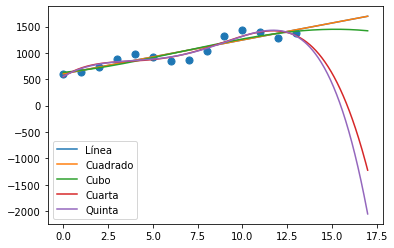

In [139]:
xn = np.linspace(0, 17, 500)
yn1 = resultado_1[0] + resultado_1[1]*xn
yn2 = resultado_2[0] + resultado_2[1]*xn + resultado_2[2]*xn**2
yn3 = resultado_3[0] + resultado_3[1]*xn + resultado_3[2]*xn**2 + resultado_3[3]*xn**3
yn4 = resultado_4[0] + resultado_4[1]*xn + resultado_4[2]*xn**2 + resultado_4[3]*xn**3 + resultado_4[4]*xn**4
yn5 = resultado_5[0] + resultado_5[1]*xn + resultado_5[2]*xn**2 + resultado_5[3]*xn**3 + resultado_5[4]*xn**4 + resultado_5[5]*xn**5

plt.figure()
plt.scatter(x, y, s=50)
plt.plot(xn, yn1, label="Línea")
plt.plot(xn, yn2, label="Cuadrado")
plt.plot(xn, yn3, label="Cubo")
plt.plot(xn, yn4, label="Cuarta")
plt.plot(xn, yn5, label="Quinta")
plt.legend(loc="best")

### Predicción para el año 2020

In [128]:
x2021 = 2021 - 1989
pred1 = resultado_1[0] + resultado_1[1]*x2021
pred2 = resultado_2[0] + resultado_2[1]*x2021 + resultado_2[2]*x2021**2
pred3 = resultado_3[0] + resultado_3[1]*x2021 + resultado_3[2]*x2021**2 + resultado_3[3]*x2021**3
pred4 = resultado_4[0] + resultado_4[1]*x2021 + resultado_4[2]*x2021**2 + resultado_4[3]*x2021**3 + resultado_4[4]*x2021**4
pred5 = resultado_5[0] + resultado_5[1]*x2021 + resultado_5[2]*x2021**2 + resultado_5[3]*x2021**3 + resultado_5[4]*x2021**4 + resultado_5[5]*x2021**5

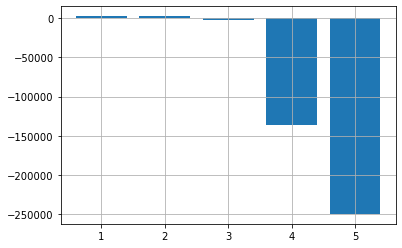

In [129]:
plt.figure()
plt.bar([1, 2, 3, 4,5], [pred1, pred2, pred3, pred4, pred5])
plt.grid()

### El error de las ecuaciones de grado 1 y 2 son prácticamente iguales, concluyo que la de grado 2 es ligeramente mejor por no ser lineal

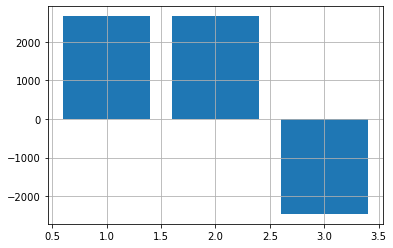

In [130]:
plt.figure()
plt.bar([1, 2, 3], [pred1, pred2, pred3])
plt.grid()

## En 2020 habrá 2662.21 bancarrotas (expresado en miles).

In [145]:
pred2

2662.210667356162

## La función que mejor se ajusta para predicción es la de grado 2

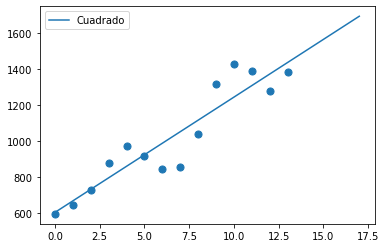

In [142]:
plt.figure()
plt.scatter(x, y, s=50)
plt.plot(xn, yn2, label="Cuadrado")
plt.legend(loc="best")

In [146]:
x1995 = 1995.5 - 1989
pred1 = resultado_1[0] + resultado_1[1]*x1995
pred2 = resultado_2[0] + resultado_2[1]*x1995 + resultado_2[2]*x1995**2
pred3 = resultado_3[0] + resultado_3[1]*x1995 + resultado_3[2]*x1995**2 + resultado_3[3]*x1995**3
pred4 = resultado_4[0] + resultado_4[1]*x1995 + resultado_4[2]*x1995**2 + resultado_4[3]*x1995**3 + resultado_4[4]*x1995**4
pred5 = resultado_5[0] + resultado_5[1]*x1995 + resultado_5[2]*x1995**2 + resultado_5[3]*x1995**3 + resultado_5[4]*x1995**4 + resultado_5[5]*x1995**5

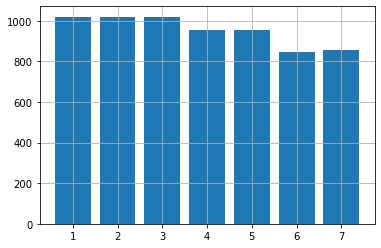

In [147]:
plt.figure()
plt.bar([1, 2, 3, 4, 5, 6, 7], [pred1, pred2, pred3, pred4, pred5, 845.5, 858.1])
plt.grid()

### Las primeras 5 barras son nuestras predicciones utilizando nuestras ecuaciones desde grado 1 a 5 respectivamente. La barra 6 son los datos reales de finales de 1994. La barra 7 son los datos reales de finales de 1995

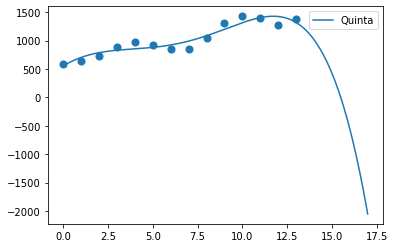

In [148]:
plt.figure()
plt.scatter(x, y, s=50)
plt.plot(xn, yn5, label="Quinta")
plt.legend(loc="best")

## Concluimos que la ecuación de 5 grado es la que se mejor se ajusta para predecir un valor que se encuentre dentro de los puntos que se nos dieron (desde 1988 hasta 2001). La ecuación de grado 2 es la mejor para predecir valores que se encuentren fuera del rango de nuestros puntos (2002 en adelante).